# **Ejercicio de Regresión Lineal Simple**

### **Costo médico Activos de Datos Personales**

#### Pronóstico de seguros mediante regresión lineal

**Acerca de Dataset**

**Contexto**

Machine Learning with R by Brett Lantz es un libro que proporciona una introducción al aprendizaje automático utilizando R. Por lo que puedo decir, Packt Publishing no pone a disposición de sus conjuntos de datos en línea a menos que compre el libro y cree una cuenta de usuario que puede ser un problema si usted está comprobando el libro de la biblioteca o tomando prestado el libro de un amigo. Todos estos conjuntos de datos son de dominio público, pero simplemente necesitaban algo de limpieza y codificación para que coincidiera con el formato del libro.
Contenido

**Columnas**

* edad: edad del beneficiario principal

* sexo: contratista de seguros género, mujer, hombre

* bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo del peso corporal (kg / m 2) utilizando la relación de altura/peso, idealmente de 18,5 a 24,9

* niños: Número de niños cubiertos por el seguro de salud / Número de dependientes

* fumador: Fumar

* región: la zona residencial del beneficiario en EE.UU., noreste, sureste, suroeste, noroeste.

* Cargos: Costos médicos individuales facturados por seguro médico


Fuente: https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download


### Paso 1: Cargue de las librerías

In [27]:
# Libreria para operaciones estadísticas/matemáticas/estructuras de datos
import numpy as np
# Libreria para el manejo de los datos
import pandas as pd
# Libreria para gráficas 2D
import matplotlib.pyplot as plt
# Libreria para gráficas 3D
import seaborn as sb
# Libreria para la transformación de los datos
from sklearn.preprocessing import LabelEncoder
# Libreria para la separación de los datos
from sklearn.model_selection import train_test_split
# Libreria para el algoritmo de Regresión Lineal
from sklearn.linear_model import LinearRegression
# Libreria para las métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Paso 2: Cargue de la data

In [3]:
# Se carga la data en un DataFrame
data = pd.read_csv("insurance.csv", sep=",")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Paso 3: Preprocesamiento de la data

In [4]:
# Identificar los valores NaN
print("Columna  NaN")
data.isnull().sum()

# data.dropna()

Columna  NaN


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Se cambia el género por un valor númerico
le = LabelEncoder()

data['genero'] = le.fit_transform( data['sex'] )
data['fumador'] = le.fit_transform( data['smoker'] )
data['ciudad'] = le.fit_transform( data['region'] )

data

,age,sex,bmi,children,smoker,region,charges,genero,fumador,ciudad
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [6]:
# Se visualiza las estadísticas de los datos
data.describe()

,age,bmi,children,charges,genero,fumador,ciudad
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,1.515695
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,2.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


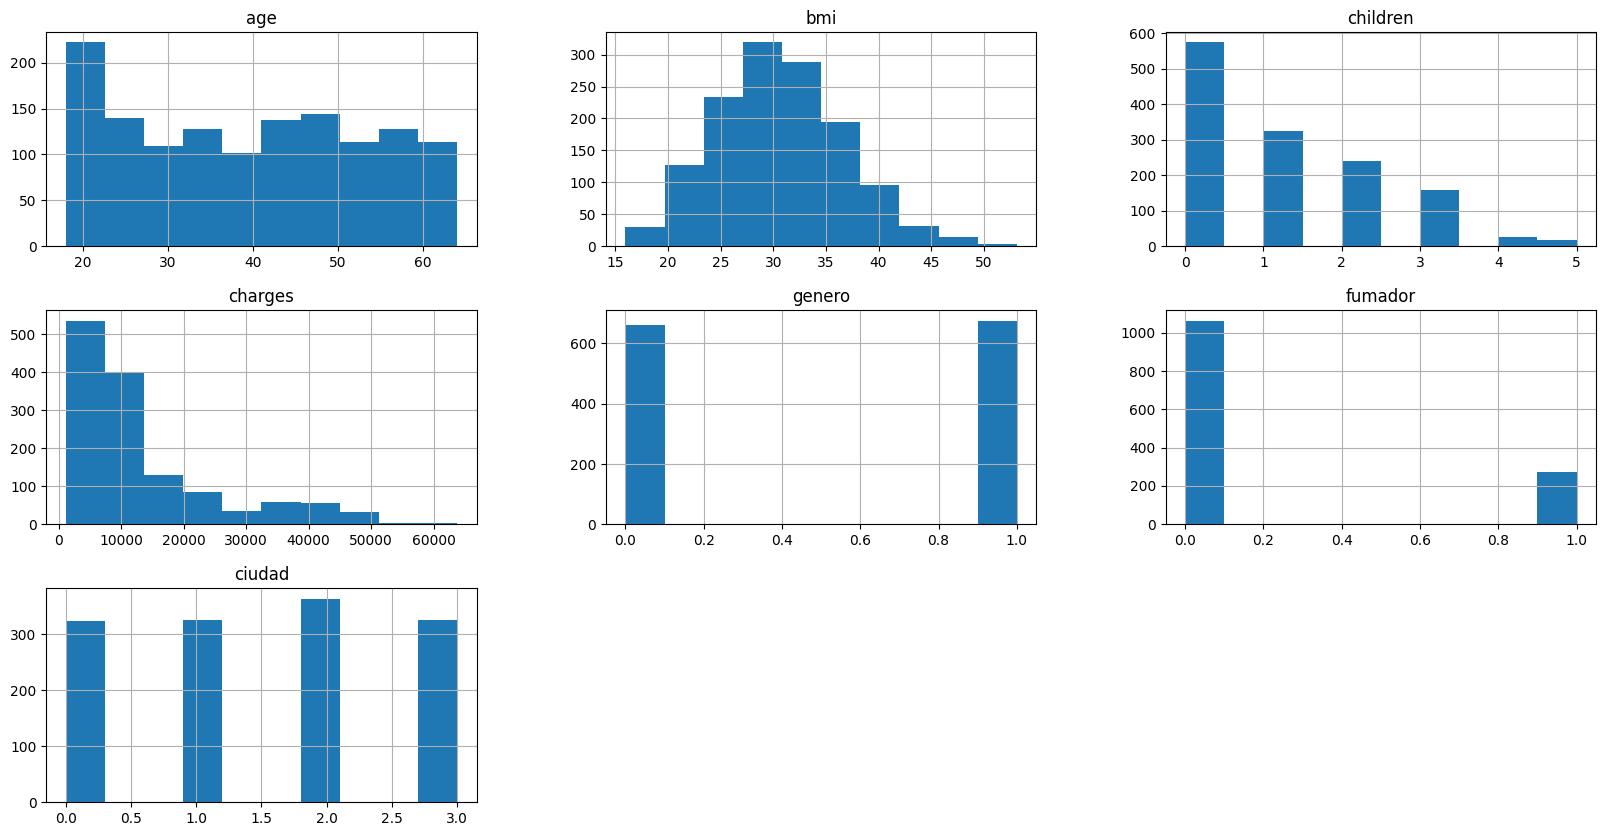

In [8]:
# Se genera un histograma de los datos
data.hist()
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

### Paso 4: Selección de la variable independiente (X) y la variable dependiente (Y)

In [11]:
# Se define un nuevo dataframe con valores solo númericos para luego generar la correlación entre las variables
data_new = pd.concat([data['age'], data['bmi'], data['children'], data['charges'], data['genero'], data['fumador'], data['ciudad'] ], axis=1)	

data_new

,age,bmi,children,charges,genero,fumador,ciudad
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


<Axes: >

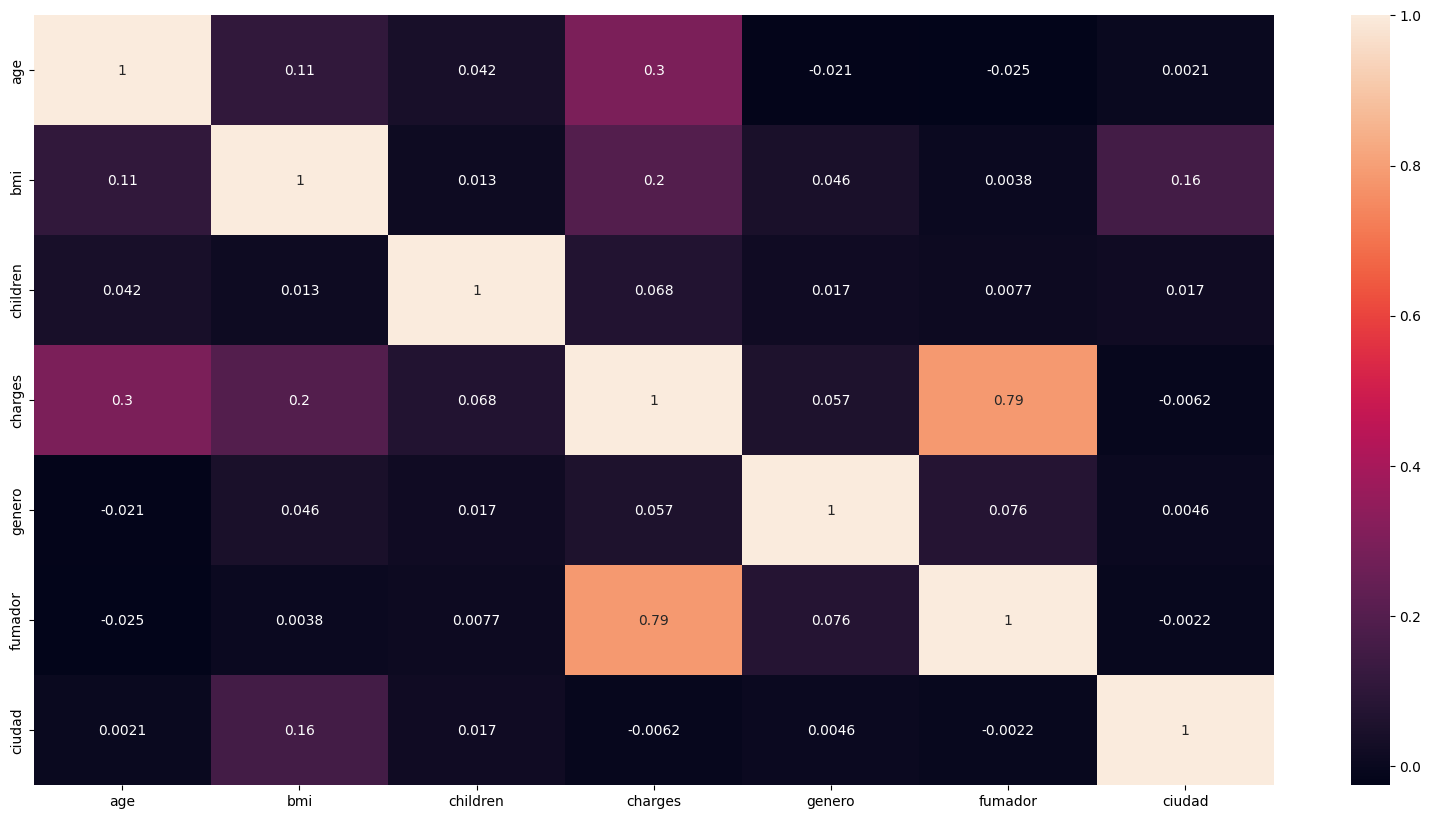

In [12]:
# Correlación de Pearson
matriz = data_new.corr(method="pearson")

# Gráfica de Mapa de Calor
sb.heatmap(matriz, annot=True)

<Axes: >

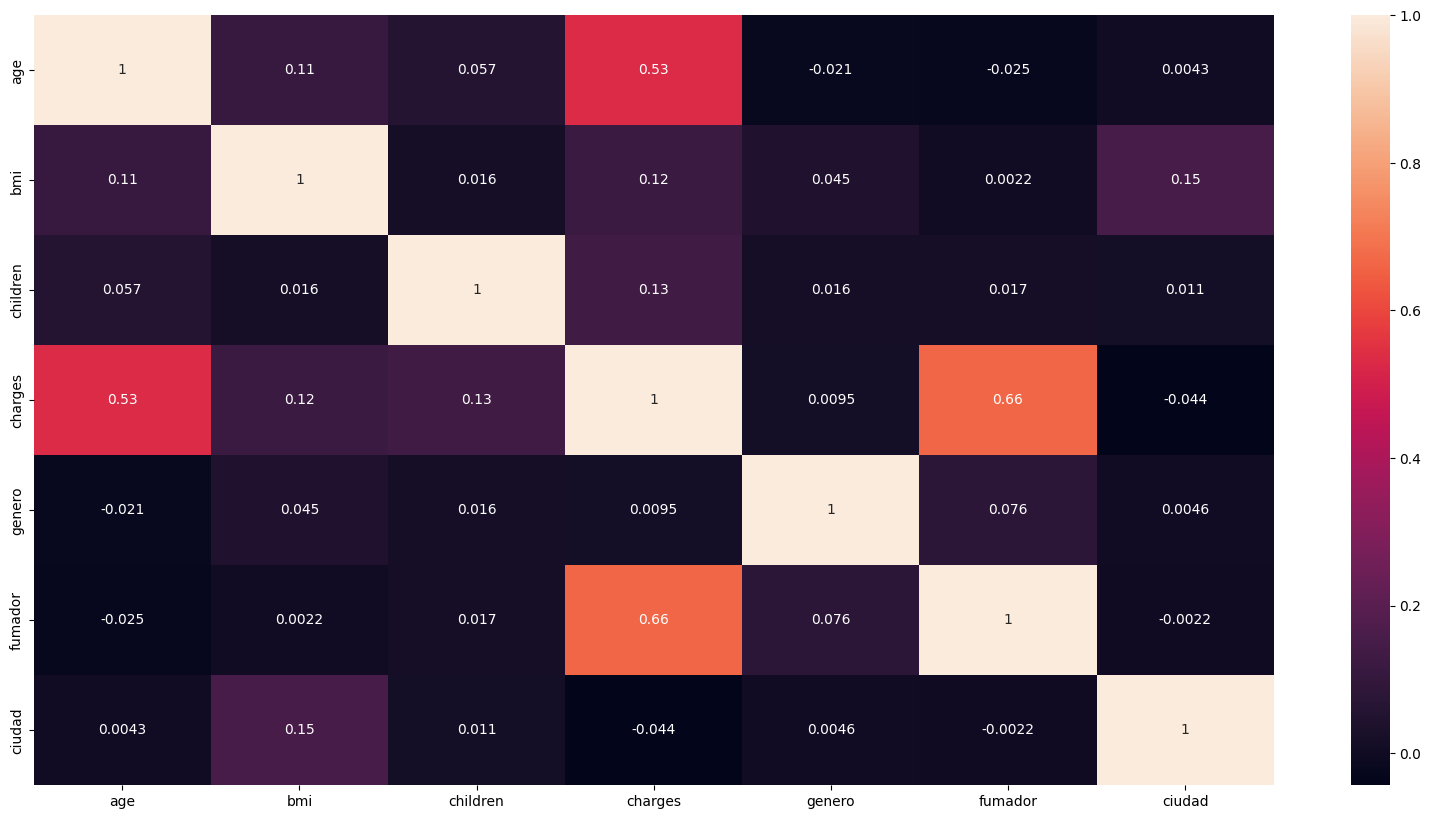

In [13]:
# Correlación de Spearman
matriz = data_new.corr(method="spearman")

# Gráfica de Mapa de Calor
sb.heatmap(matriz, annot=True)

<Axes: >

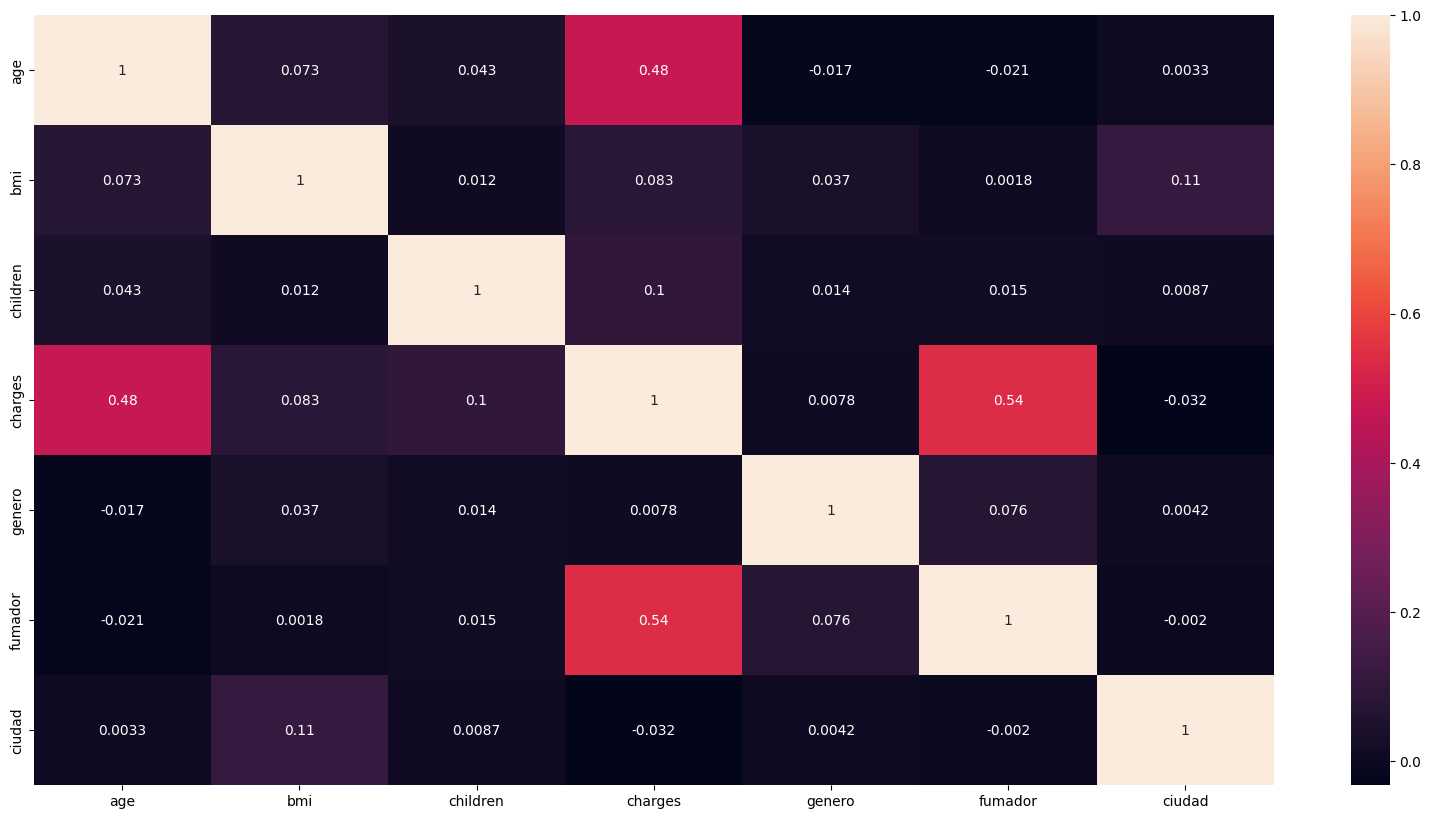

In [14]:
# Correlación de Kendall
matriz = data_new.corr(method="kendall")

# Gráfica de Mapa de Calor
sb.heatmap(matriz, annot=True)

### Paso 5: Gráfica de las variables seleccionadas para la predicción

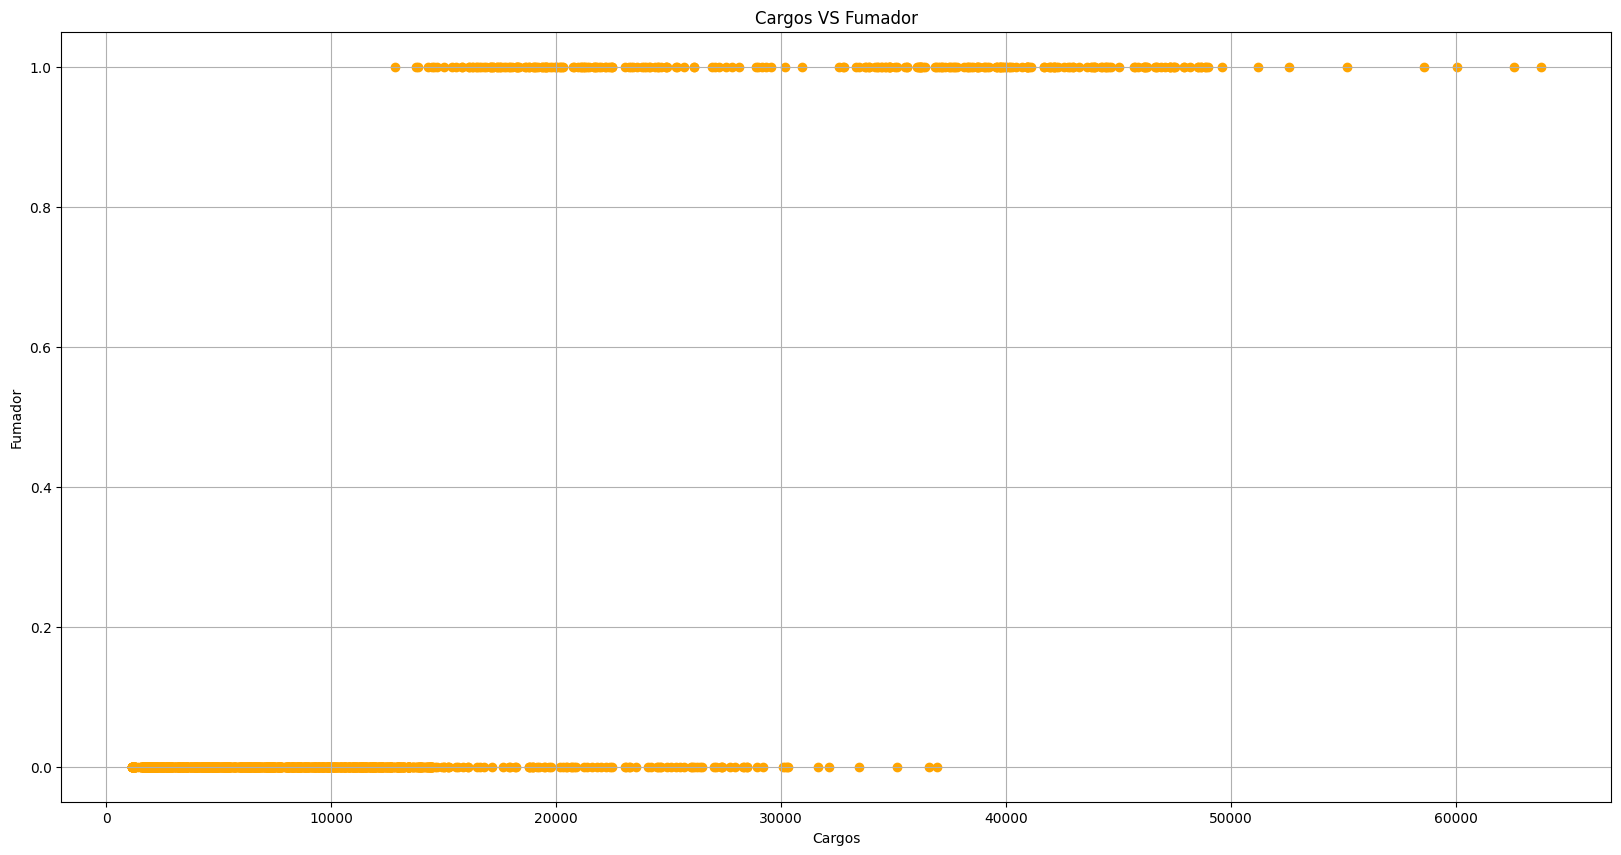

In [28]:
# Se genera una gráfica de nube de puntos
x = data_new['charges'].values
y = data_new['fumador'].values

plt.scatter(x, y, color="orange")
plt.title("Cargos VS Fumador")
plt.xlabel("Cargos")
plt.ylabel("Fumador")
plt.grid()
plt.show()

### Paso 6: Regresion Lineal simple entre la estatura y el peso

In [42]:
# Se define la variable independiente (X) y dependiente (Y)
features = ['charges']
target = ['fumador']
# Independiente
x = data_new[features]
# Depediente
y = data_new[target]

# Se genera la separación de los datos (80% entrenamiento y 20% pruebas)
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Se define el algoritmo de predicción
lr = LinearRegression()

# Se entrena el modelo de predicción
lr.fit(X_train, y_train)

# Se genera la predicción
prediction = lr.predict(X_test)

# Se genera la métrica
print(f"R2: {r2_score(y_test, prediction):.2}")
print(f"MSE: {mean_squared_error(y_test, prediction):.2}")
print(f"MAE: {mean_absolute_error(y_test, prediction):.2}")

R2: 0.67
MSE: 0.054
MAE: 0.15


## Paso 7: Gráfica de la regresión lineal simple

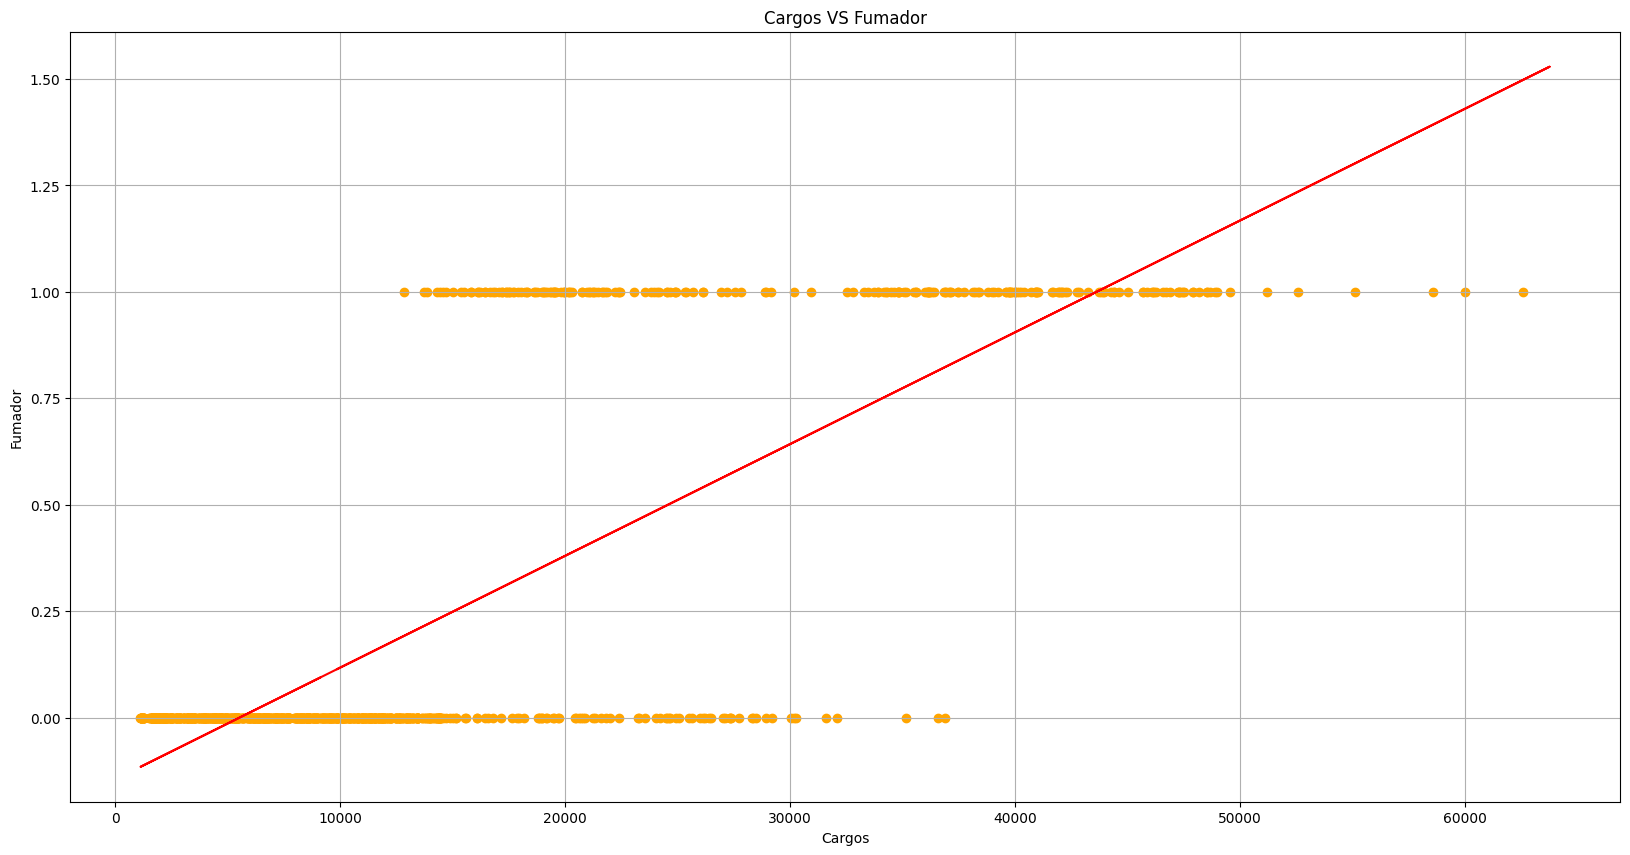

In [43]:
# Se genera una gráfica de la regresión lineal
plt.scatter(X_train['charges'], y_train['fumador'], color="orange")
plt.plot(X_test['charges'], prediction, color="red")
plt.title("Cargos VS Fumador")
plt.xlabel("Cargos")
plt.ylabel("Fumador")
plt.grid()
plt.show()